<a href="https://colab.research.google.com/github/Piyush01Bhatt/DataScience-Competitions/blob/master/Incedo_Addiction_Probability_to_Drug.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!unzip Dataset1Incedo.zip

Archive:  Dataset1Incedo.zip
  inflating: test_file.csv           
   creating: __MACOSX/
  inflating: __MACOSX/._test_file.csv  
  inflating: train_file.csv          
  inflating: __MACOSX/._train_file.csv  


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
from scipy.stats import pearsonr
import re
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [0]:
train = pd.read_csv('train_file.csv')
test = pd.read_csv('test_file.csv')

In [0]:
train.head()

,Patient_ID,YEAR,LocationDesc,Subtopic,Greater_Risk_Question,Description,Sample_Size,Sex,Race,Grade,GeoLocation,QuestionCode,StratID1,StratID2,StratID3,StratificationType,Greater_Risk_Probability
0,1,1995,"Houston, TX",1,Ever used cocaine,"any form of cocaine, such as powder, crack, or...",335.0,Female,Hispanic or Latino,4,"(29.760427, -95.369803)",H49,1,4,0,Local,7.4793
1,2,1997,"Houston, TX",0,Currently drank alcohol,"at least one drink of alcohol, on at least 1 d...",382.0,Total,Black or African American,4,"(29.760427, -95.369803)",H42,0,3,0,Local,49.6852
2,3,1993,Nevada,0,Had their first drink of alcohol before age 13...,other than a few sips,196.0,Female,White,0,"(39.493240390000494, -117.07184056399967)",H41,1,6,2,State,47.8132
3,4,2017,Pennsylvania,1,Ever used cocaine,"any form of cocaine, such as powder, crack, or...",104.0,Male,Asian,4,"(40.79373015200048, -77.86070029399963)",H49,2,2,0,State,3.4554
4,5,2007,"San Francisco, CA",1,Ever took steroids without a doctor's prescrip...,"pills or shots, one or more times during their...",100.0,Female,Multiple Race,4,"(37.77493, -122.419416)",H55,1,7,0,Local,0.0000


In [0]:
train.shape

(55399, 17)

##**EDA**

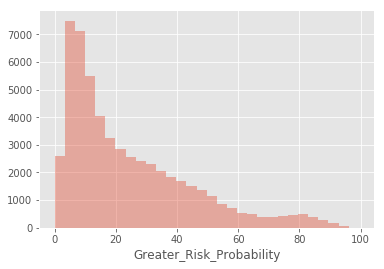

In [0]:
sns.distplot(train['Greater_Risk_Probability'],bins=30,kde=False)

In [0]:
train['Greater_Risk_Probability'].describe()

count    55399.000000
mean        24.365664
std         20.492551
min          0.000000
25%          8.280050
50%         17.555600
75%         35.430750
max         99.449400
Name: Greater_Risk_Probability, dtype: float64

In [0]:
train['Subtopic'].value_counts()

1    41398
0    14001
Name: Subtopic, dtype: int64

label 1 is any other drug use and label 0 is alcohol use

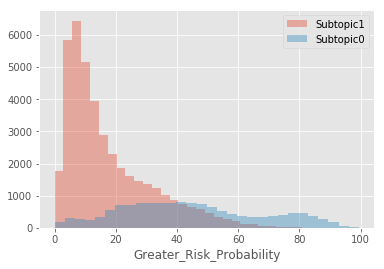

In [0]:
sns.distplot(train.loc[train['Subtopic']==1,'Greater_Risk_Probability'],bins=30,label='Subtopic1',kde=False)
sns.distplot(train.loc[train['Subtopic']==0,'Greater_Risk_Probability'],bins=30,label='Subtopic0',kde=False)
plt.legend()

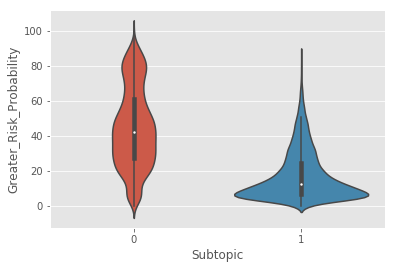

In [0]:
sns.violinplot(x='Subtopic',y='Greater_Risk_Probability',data=train)

In [0]:
train['Greater_Risk_Question'].value_counts()

Currently used marijuana                                                                                                     4421
Had their first drink of alcohol before age 13 years                                                                         4265
Tried marijuana for the first time before age 13 years                                                                       4247
Currently drank alcohol                                                                                                      4204
Ever used cocaine                                                                                                            4072
Were offered, sold, or given an illegal drug on school property                                                              3894
Ever used marijuana                                                                                                          3734
Ever injected any illegal drug                                                            

In [0]:
def get_risk_type(row):
  if 'marijuana' in row:
    return 'marijuana'
  elif 'alcohol' in row or 'drinking' in row:
    return 'alcohol'
  elif 'cocaine' in row:
    return 'cocaine'
  elif 'steroid' in row:
    return 'steroid'
  elif 'methamphetamines' in row:
    return 'methamphetamines'
  elif 'heroin' in row:
    return 'heroin'
  elif 'ecstasy' in row:
    return 'ecstasy'
  elif 'inhalant' in row:
    return 'inhalant'
  else:
    return 'other_drugs'
  

In [0]:
train['Risk_Type'] = train['Greater_Risk_Question'].apply(get_risk_type)

In [0]:
test['Risk_Type'] = test['Greater_Risk_Question'].apply(get_risk_type)

In [0]:
train['Risk_Type'].value_counts()

alcohol             13228
marijuana           13093
other_drugs          8737
cocaine              4072
inhalant             3509
steroid              3470
methamphetamines     3331
heroin               3294
ecstasy              2665
Name: Risk_Type, dtype: int64

(0, 8000)

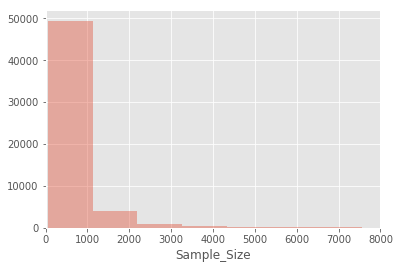

In [0]:
sns.distplot(train['Sample_Size'],kde=False)
plt.xlim(0,8000)

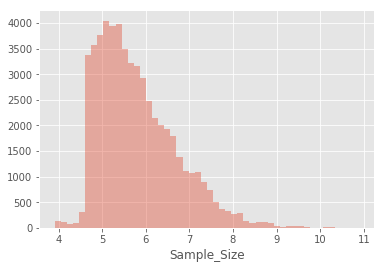

In [0]:
sns.distplot(np.log(train['Sample_Size']),kde=False)

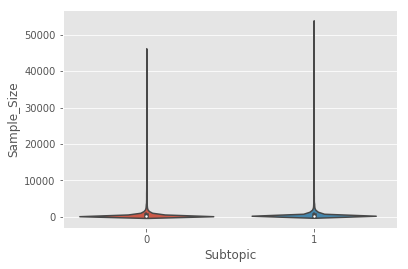

In [0]:
sns.violinplot(x='Subtopic',y='Sample_Size',data=train)

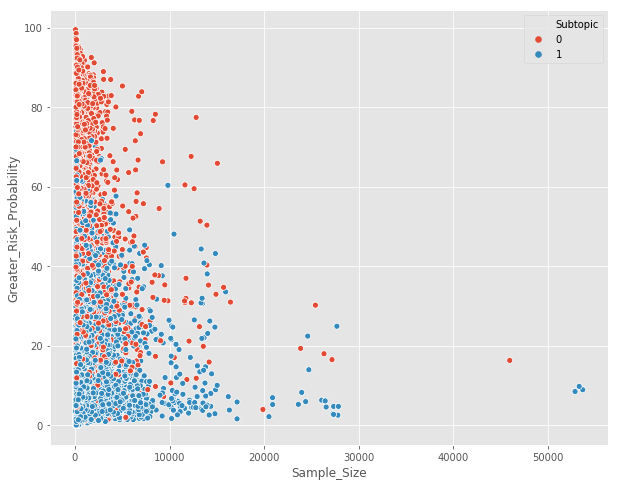

In [0]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='Sample_Size',y='Greater_Risk_Probability',hue='Subtopic',data=train)

In [0]:
pearsonr(np.log(train['Sample_Size']).values,train['Greater_Risk_Probability'])

(-0.11189025177786895, 8.513313287612428e-154)

In [0]:
train['Sex'].value_counts()

Total     22057
Female    16973
Male      16369
Name: Sex, dtype: int64

In [0]:
train['StratID1'].value_counts()

0    22057
1    16973
2    16369
Name: StratID1, dtype: int64

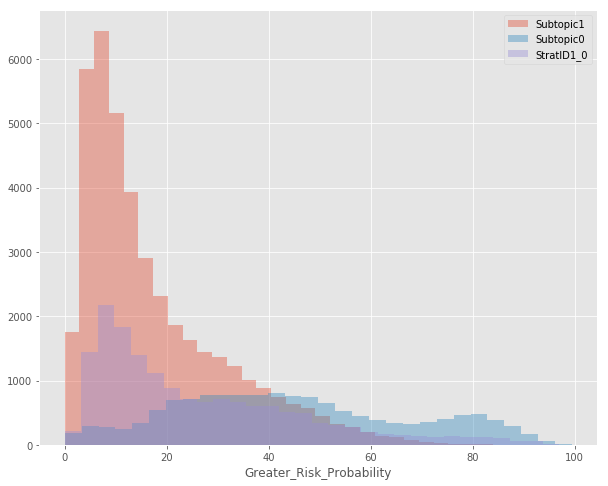

In [0]:
plt.figure(figsize=(10,8))
sns.distplot(train.loc[train['Subtopic']==1,'Greater_Risk_Probability'],bins=30,label='Subtopic1',kde=False)
sns.distplot(train.loc[train['Subtopic']==0,'Greater_Risk_Probability'],bins=30,label='Subtopic0',kde=False)
sns.distplot(train.loc[train['StratID1']==2,'Greater_Risk_Probability'],bins=30,label='StratID1_0',kde=False)
plt.legend()

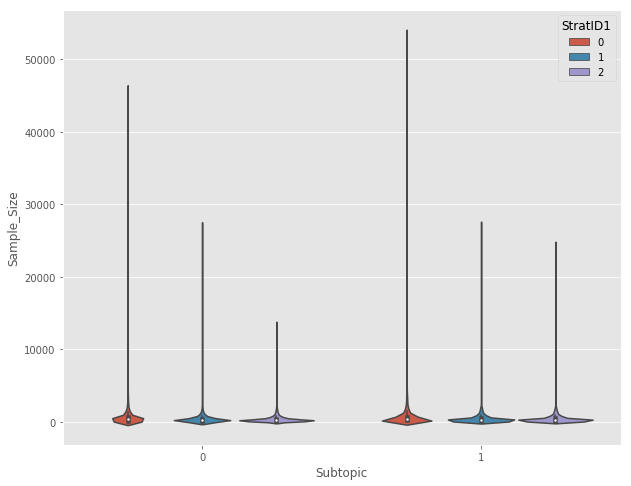

In [0]:
plt.figure(figsize=(10,8))
sns.violinplot(x='Subtopic',y='Sample_Size',hue='StratID1',data=train)

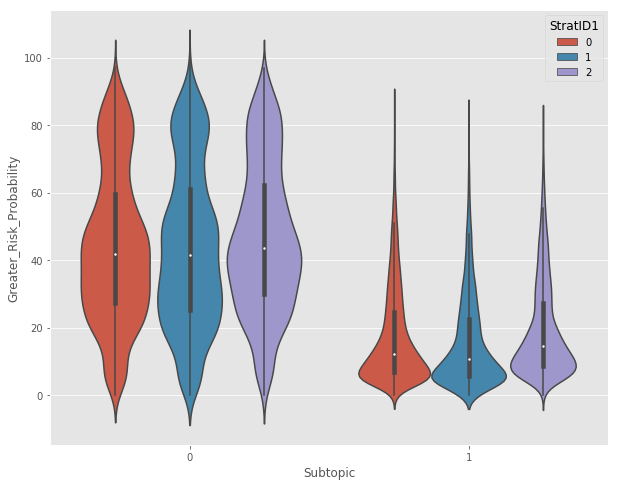

In [0]:
plt.figure(figsize=(10,8))
sns.violinplot(x='Subtopic',y='Greater_Risk_Probability',hue='StratID1',data=train)

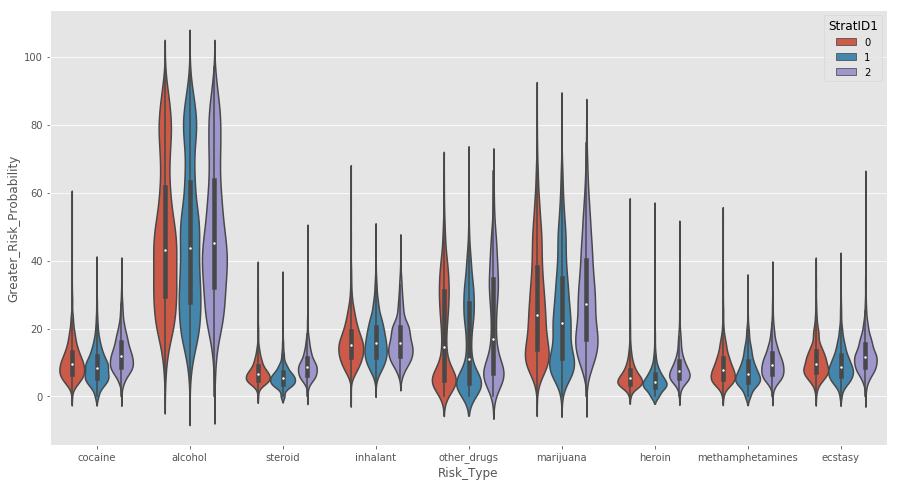

In [0]:
plt.figure(figsize=(15,8))
sns.violinplot(x='Risk_Type',y='Greater_Risk_Probability',hue='StratID1',data=train)

In [0]:
train['StratID2'].value_counts()

0    22252
6    13448
4     7855
3     7078
2     2053
7     1088
5      978
1      647
Name: StratID2, dtype: int64

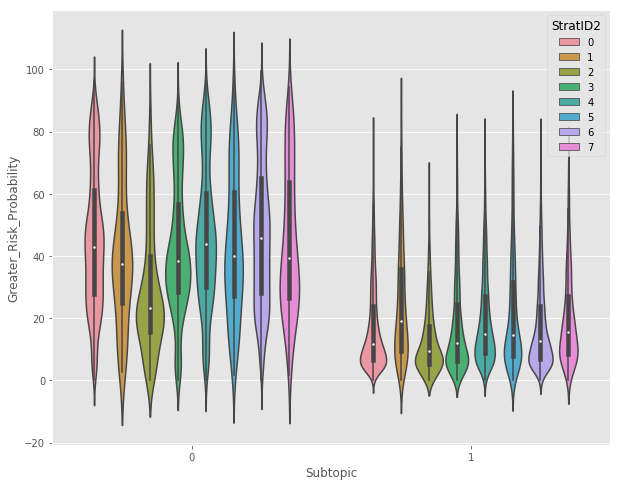

In [0]:
plt.figure(figsize=(10,8))
sns.violinplot(x='Subtopic',y='Greater_Risk_Probability',hue='StratID2',data=train)

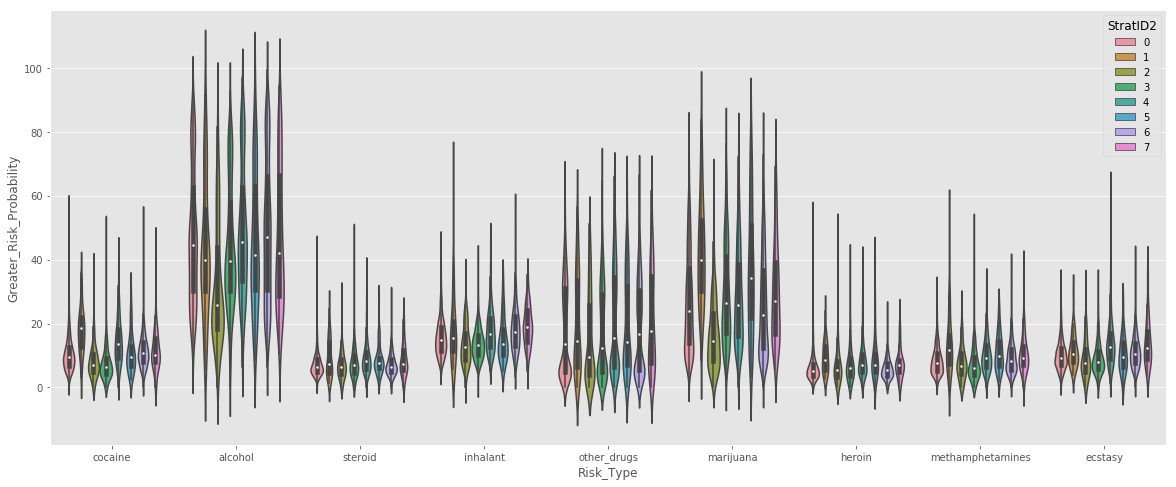

In [0]:
plt.figure(figsize=(20,8))
sns.violinplot(x='Risk_Type',y='Greater_Risk_Probability',hue='StratID2',data=train)

In [0]:
train['StratID3'].value_counts()

0    16512
1    10269
2    10202
3     9677
4     8739
Name: StratID3, dtype: int64

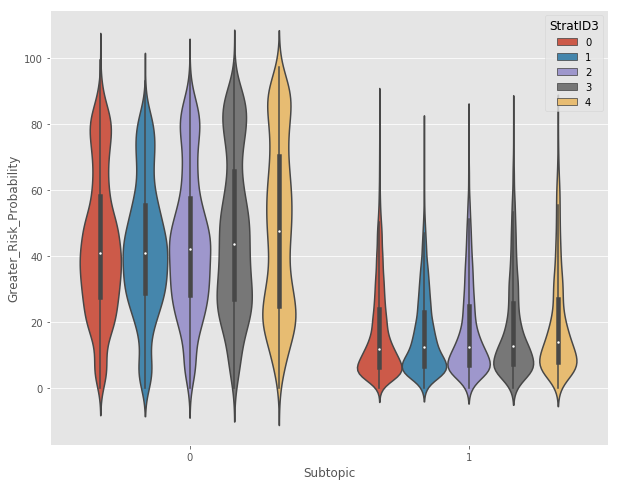

In [0]:
plt.figure(figsize=(10,8))
sns.violinplot(x='Subtopic',y='Greater_Risk_Probability',hue='StratID3',data=train)

In [0]:
train['StratificationType'].value_counts()

State        31878
Local        18129
Territory     2467
National      2276
Other          649
Name: StratificationType, dtype: int64

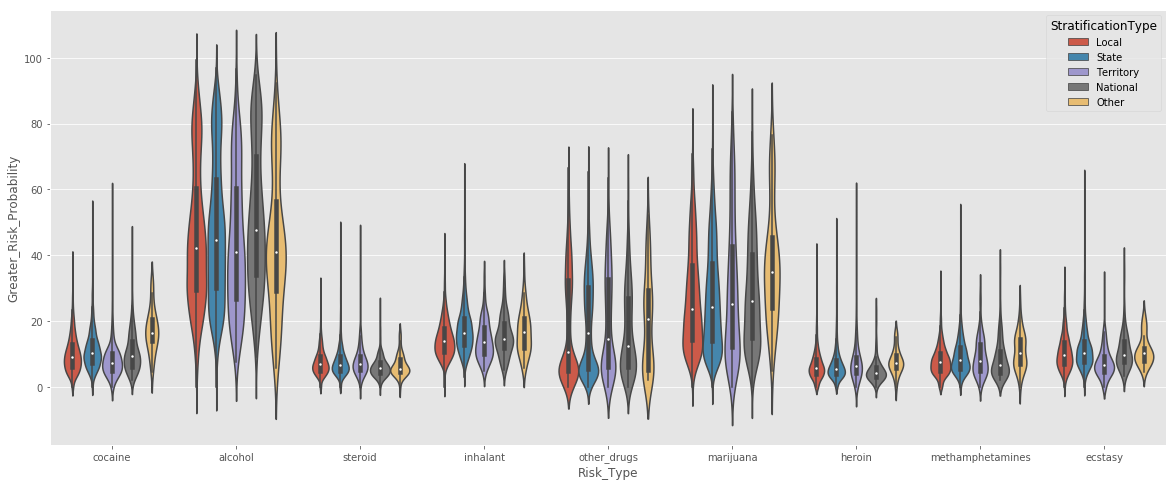

In [0]:
plt.figure(figsize=(20,8))
sns.violinplot(x='Risk_Type',y='Greater_Risk_Probability',hue='StratificationType',data=train)

In [0]:
train['Grade'].value_counts()

4    16512
3    10269
0    10202
1     9677
2     8739
Name: Grade, dtype: int64

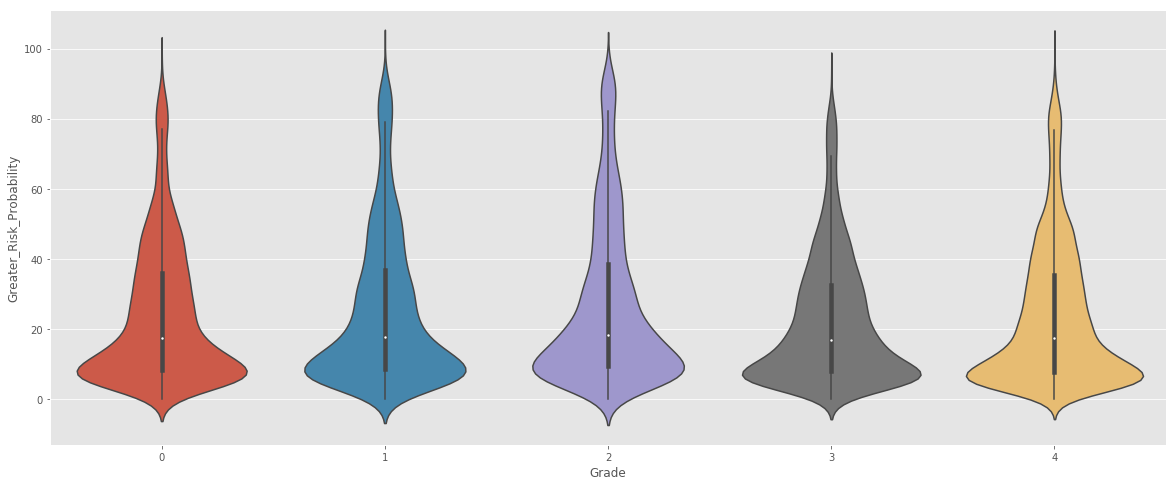

In [0]:
plt.figure(figsize=(20,8))
sns.violinplot(x='Grade',y='Greater_Risk_Probability',data=train)

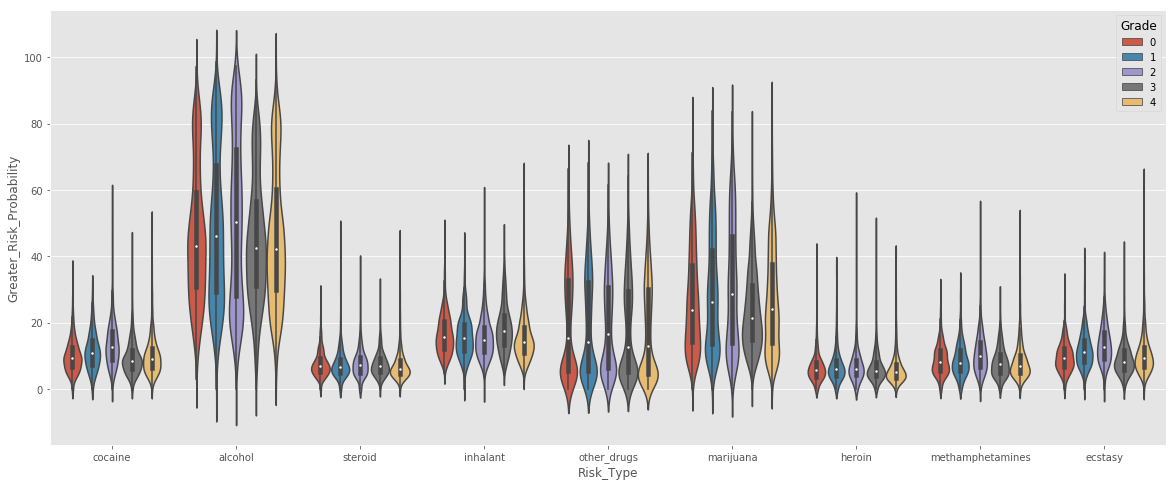

In [0]:
plt.figure(figsize=(20,8))
sns.violinplot(x='Risk_Type',y='Greater_Risk_Probability',hue='Grade',data=train)

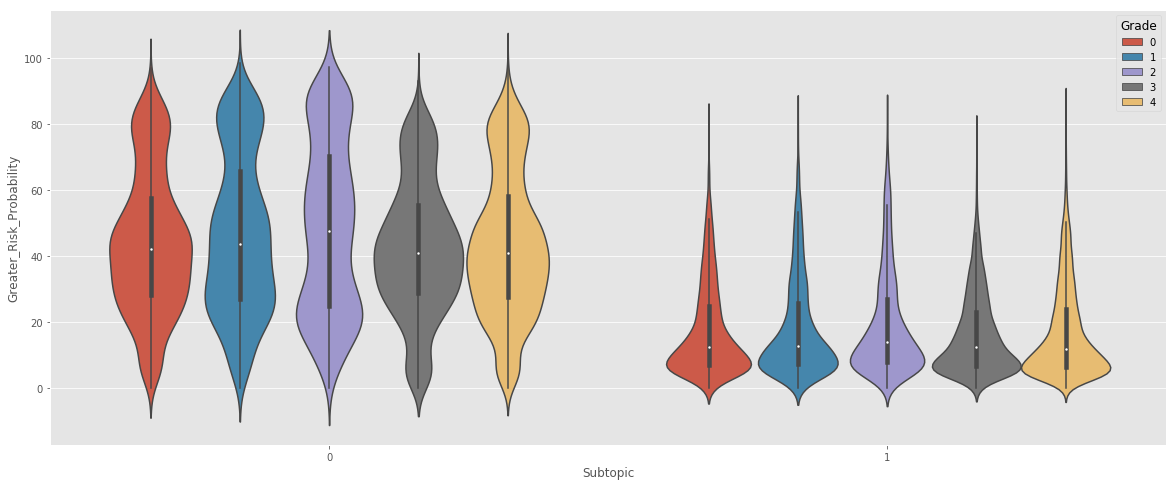

In [0]:
plt.figure(figsize=(20,8))
sns.violinplot(x='Subtopic',y='Greater_Risk_Probability',hue='Grade',data=train)

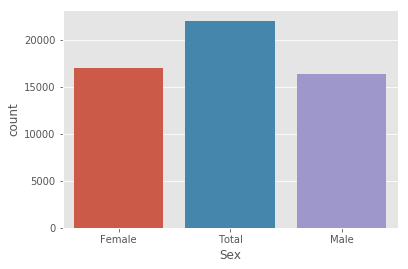

In [0]:
sns.countplot(train['Sex'])

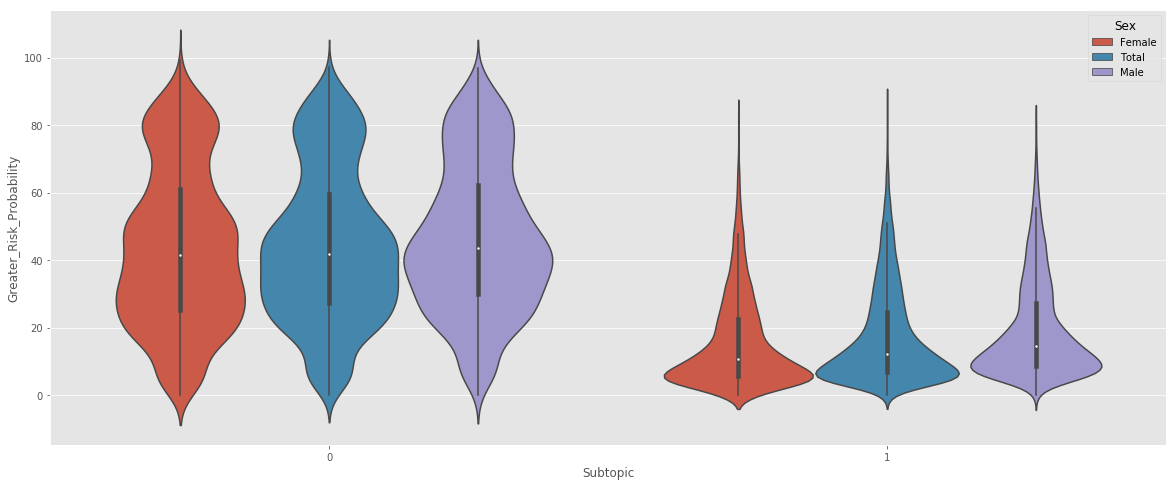

In [0]:
plt.figure(figsize=(20,8))
sns.violinplot(x='Subtopic',y='Greater_Risk_Probability',hue='Sex',data=train)

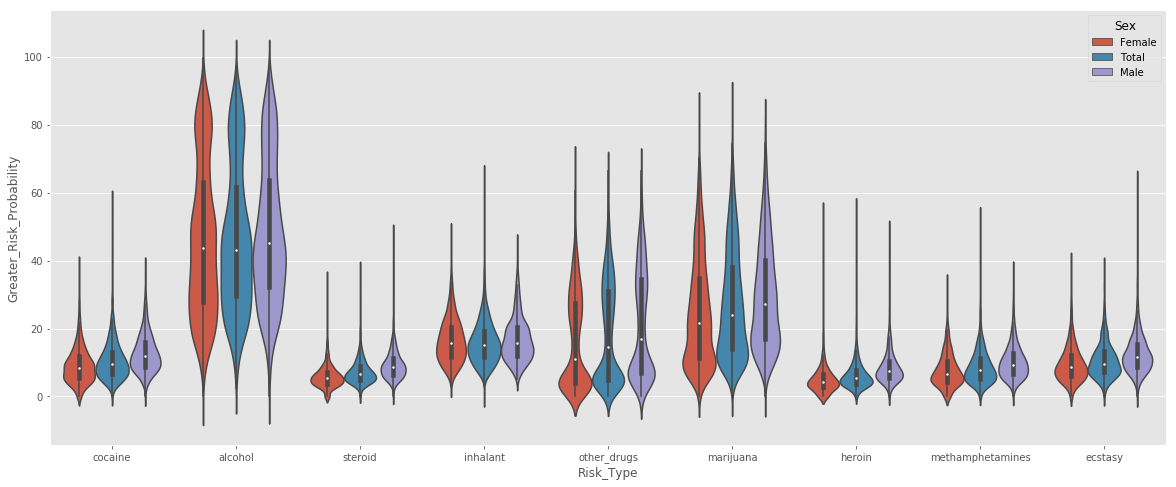

In [0]:
plt.figure(figsize=(20,8))
sns.violinplot(x='Risk_Type',y='Greater_Risk_Probability',hue='Sex',data=train)

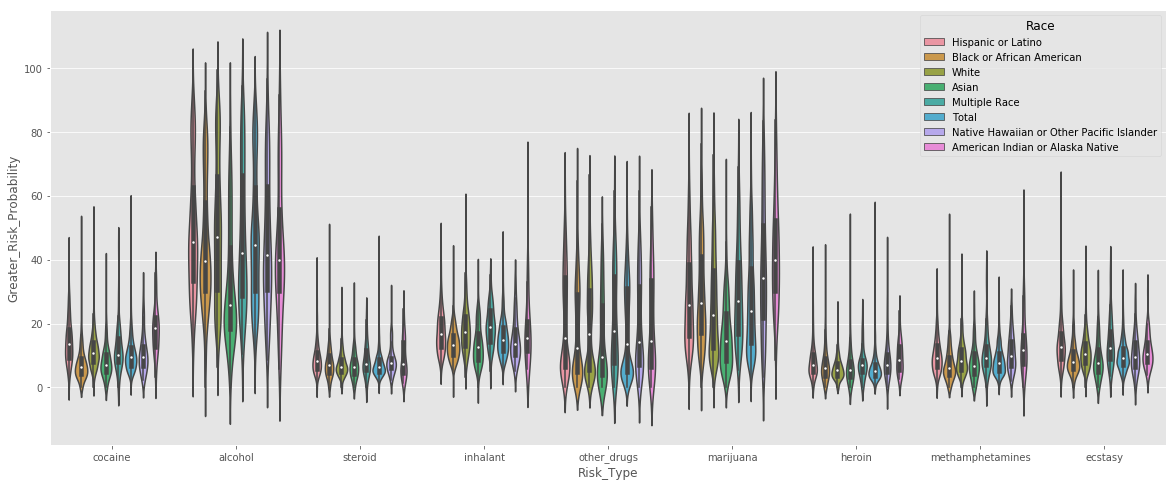

In [0]:
plt.figure(figsize=(20,8))
sns.violinplot(x='Risk_Type',y='Greater_Risk_Probability',hue='Race',data=train)

In [0]:
re.split('[,()]+',train['GeoLocation'][0])[2].strip()
train['lat'] = train['GeoLocation'].apply(lambda x: float(re.split('[,()]+',x)[1].strip()) if type(x) is str else -99999)
train['lng'] = train['GeoLocation'].apply(lambda x:-float(re.split('[,()]+',x)[2].strip()) if type(x) is str else -99999)

In [0]:
test['lat'] = test['GeoLocation'].apply(lambda x: float(re.split('[,()]+',x)[1].strip()) if type(x) is str else -99999)
test['lng'] = test['GeoLocation'].apply(lambda x:-float(re.split('[,()]+',x)[2].strip()) if type(x) is str else -99999)

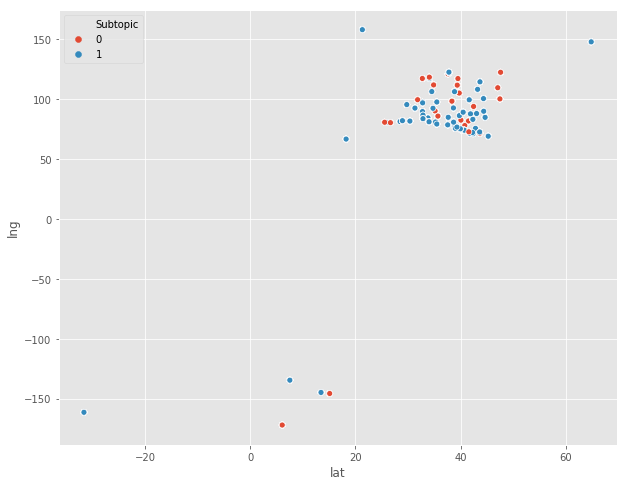

In [0]:
plt.figure(figsize=(10,8))
sns.scatterplot(train.loc[train['lat']!=-99999,'lat'],train.loc[train['lng']!=-99999,'lng'],hue='Subtopic',data=train)

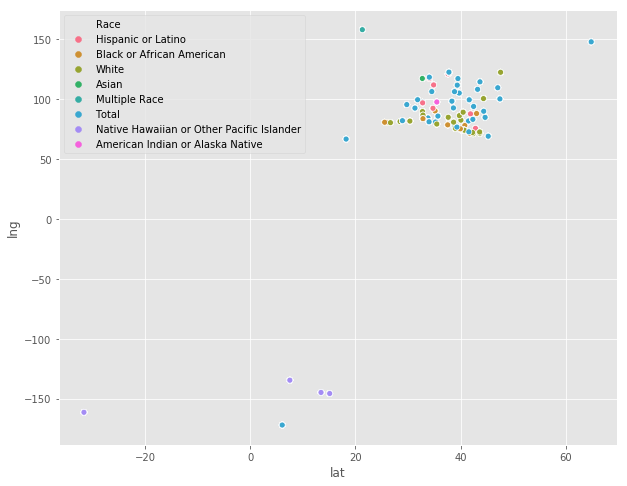

In [0]:
plt.figure(figsize=(10,8))
sns.scatterplot(train.loc[train['lat']!=-99999,'lat'],train.loc[train['lng']!=-99999,'lng'],hue='Race',data=train)

In [0]:
len(train[train['lng']==-99999])

3301

In [0]:
train['LocationDesc'].value_counts()

United States                       2276
New York City, NY                   1396
New York                            1366
Miami-Dade County, FL               1145
San Diego, CA                       1043
Massachusetts                       1006
Maryland                            1005
Delaware                             958
Montana                              951
Michigan                             939
Florida                              938
Illinois                             902
Broward County, FL                   893
Hawaii                               889
North Carolina                       840
Nevada                               839
Chicago, IL                          837
Palm Beach County, FL                834
Alabama                              832
Texas                                830
Utah                                 824
South Carolina                       823
Philadelphia, PA                     779
Mississippi                          747
Arkansas        

##**Data Cleaning**

In [0]:
train.isnull().any()

Patient_ID                  False
YEAR                        False
LocationDesc                False
Subtopic                    False
Greater_Risk_Question       False
Description                 False
Sample_Size                 False
Sex                         False
Race                        False
Grade                       False
GeoLocation                  True
QuestionCode                False
StratID1                    False
StratID2                    False
StratID3                    False
StratificationType          False
Greater_Risk_Probability    False
Risk_Type                   False
dtype: bool

In [0]:
train['age'] = 2018 - train['YEAR']

In [0]:
test['age'] = 2018 - test['YEAR']

In [0]:
train_encoded = pd.get_dummies(data=train,columns=['Risk_Type','Subtopic','Sex','Race','Grade','StratificationType'])

In [0]:
test_encoded = pd.get_dummies(data=test,columns=['Risk_Type','Subtopic','Sex','Race','Grade','StratificationType'])

In [0]:
train_encoded.head()

,Patient_ID,YEAR,LocationDesc,Greater_Risk_Question,Description,Sample_Size,GeoLocation,QuestionCode,StratID1,StratID2,...,Grade_0,Grade_1,Grade_2,Grade_3,Grade_4,StratificationType_Local,StratificationType_National,StratificationType_Other,StratificationType_State,StratificationType_Territory
0,1,1995,"Houston, TX",Ever used cocaine,"any form of cocaine, such as powder, crack, or...",335.0,"(29.760427, -95.369803)",H49,1,4,...,0,0,0,0,1,1,0,0,0,0
1,2,1997,"Houston, TX",Currently drank alcohol,"at least one drink of alcohol, on at least 1 d...",382.0,"(29.760427, -95.369803)",H42,0,3,...,0,0,0,0,1,1,0,0,0,0
2,3,1993,Nevada,Had their first drink of alcohol before age 13...,other than a few sips,196.0,"(39.493240390000494, -117.07184056399967)",H41,1,6,...,1,0,0,0,0,0,0,0,1,0
3,4,2017,Pennsylvania,Ever used cocaine,"any form of cocaine, such as powder, crack, or...",104.0,"(40.79373015200048, -77.86070029399963)",H49,2,2,...,0,0,0,0,1,0,0,0,1,0
4,5,2007,"San Francisco, CA",Ever took steroids without a doctor's prescrip...,"pills or shots, one or more times during their...",100.0,"(37.77493, -122.419416)",H55,1,7,...,0,0,0,0,1,1,0,0,0,0


In [0]:
train_encoded.columns

Index(['Patient_ID', 'YEAR', 'LocationDesc', 'Greater_Risk_Question',
       'Description', 'Sample_Size', 'GeoLocation', 'QuestionCode', 'StratID1',
       'StratID2', 'StratID3', 'Greater_Risk_Probability', 'lat', 'lng', 'age',
       'Risk_Type_alcohol', 'Risk_Type_cocaine', 'Risk_Type_ecstasy',
       'Risk_Type_heroin', 'Risk_Type_inhalant', 'Risk_Type_marijuana',
       'Risk_Type_methamphetamines', 'Risk_Type_other_drugs',
       'Risk_Type_steroid', 'Subtopic_0', 'Subtopic_1', 'Sex_Female',
       'Sex_Male', 'Sex_Total', 'Race_American Indian or Alaska Native',
       'Race_Asian', 'Race_Black or African American',
       'Race_Hispanic or Latino', 'Race_Multiple Race',
       'Race_Native Hawaiian or Other Pacific Islander', 'Race_Total',
       'Race_White', 'Grade_0', 'Grade_1', 'Grade_2', 'Grade_3', 'Grade_4',
       'StratificationType_Local', 'StratificationType_National',
       'StratificationType_Other', 'StratificationType_State',
       'StratificationType_Territory

In [0]:
features = train_encoded.columns.drop(['Patient_ID','YEAR','LocationDesc','Greater_Risk_Question','GeoLocation',
                              'Description','QuestionCode','Greater_Risk_Probability'])
target = 'Greater_Risk_Probability'

In [0]:
X_train, X_test, y_train, y_test = train_test_split(train_encoded[features], train_encoded[target], test_size=0.33, 
                                                    random_state=42)

In [0]:
regr = RandomForestRegressor(max_depth=10,random_state=0,n_estimators=200)

In [0]:
regr.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [0]:
mean_squared_error(y_train,regr.predict(X_train))**0.5

12.175916626054828

In [0]:
mean_squared_error(y_test,regr.predict(X_test))**0.5

13.269095446396356

In [0]:
test[target] = regr.predict(test_encoded[features])

In [0]:
test[['Patient_ID',target]].to_csv('Incedo_sub.csv',index=False)

In [0]:
from google.colab import drive
drive.mount('drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at drive


In [0]:
!cp Incedo_sub.csv drive/My\ Drive

In [0]:
d = {
    'features':features,
    'importances':regr.feature_importances_
}

df = pd.DataFrame(data=d)

In [0]:
sr = pd.Series(data = regr.feature_importances_, index = features)

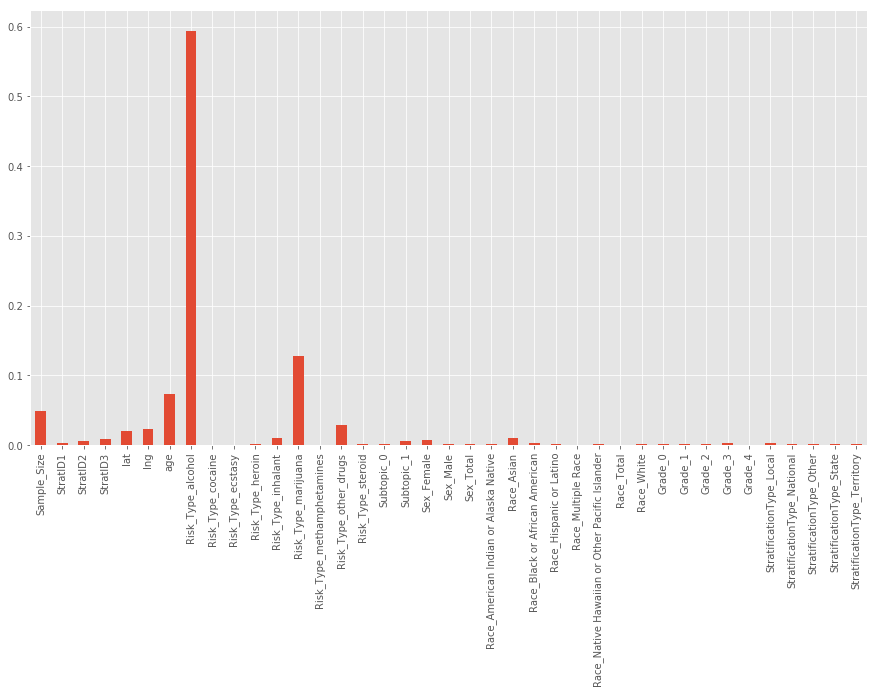

In [0]:
plt.figure(figsize=(15,8))
sr.plot(kind='bar')

In [0]:
features2 = ['Sample_Size','StratID1','StratID2','StratID3','lat','lng','age','Risk_Type_alcohol',
            'Risk_Type_inhalant','Risk_Type_marijuana','Risk_Type_other_drugs',
           'Subtopic_1','Sex_Female','Race_Asian','Race_Black or African American','Grade_3',
           'StratificationType_Local']

In [0]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(train_encoded[features2], train_encoded[target], test_size=0.33, 
                                                    random_state=42)

In [0]:
regr2 = RandomForestRegressor(max_depth=30,random_state=0,n_estimators=200,
                             min_samples_leaf=50,min_samples_split=10)

In [0]:
regr2.fit(X_train2,y_train2)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=30,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=50, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [0]:
mean_squared_error(y_train2,regr2.predict(X_train2))**0.5

12.90298252060181

In [0]:
mean_squared_error(y_test2,regr2.predict(X_test2))**0.5

13.296793680514321